## Setup and Import

100%|██████████| 468/468 [00:44<00:00, 10.48it/s]


Loaded 468 files
Total rows: 7667712
Creating RawArray with float64 data, n_channels=61, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


c:\Users\Will\miniforge3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


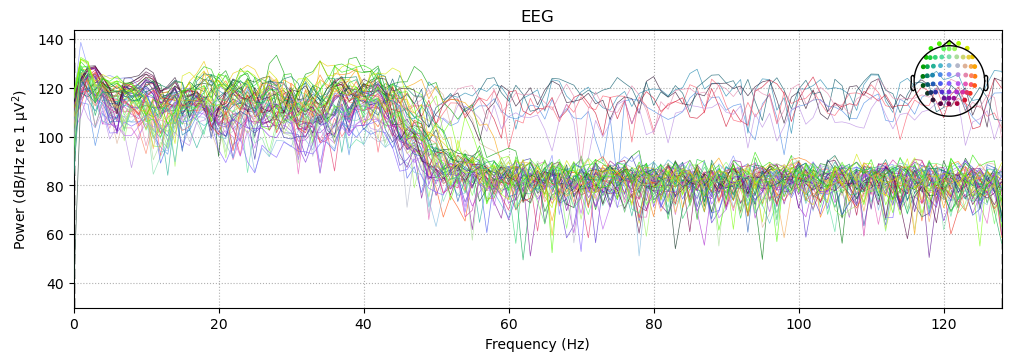

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import random
from mne.viz import plot_topomap

# Import data from main notebook
%run NDS_Project.ipynb

Creating RawArray with float64 data, n_channels=61, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


c:\Users\Will\miniforge3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


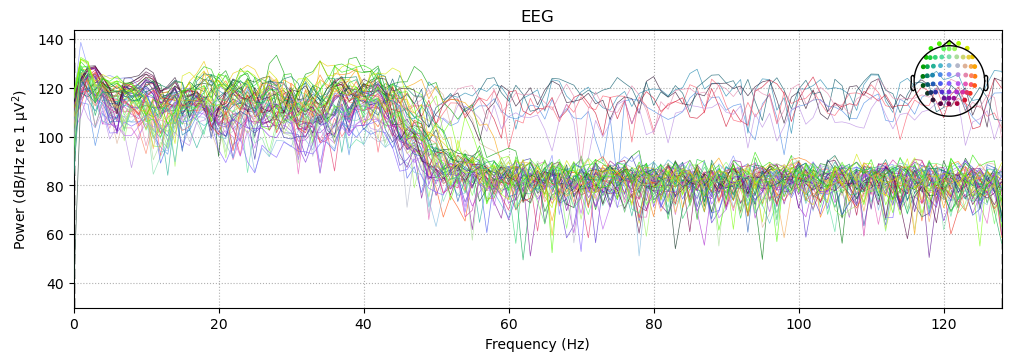

In [109]:
alc_test = csv_to_eeg_data("eeg+database/SMNI_CMI_TRAIN/Data1.csv")
alc_test.plot_psd()

## Regional Analysis: Alcoholic vs Control

In [ ]:
# Get all unique electrode positions from the data
all_electrodes = EEG_data['sensor position'].unique()
print(f"All electrode positions: {sorted(all_electrodes)}\n")

# Define brain regions based on 10-20 system's region names
regions = {
    'Fp': ['FP1', 'FP2', 'FPZ'],  # Frontopolar
    'F': ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FZ', 
          'AF1', 'AF2', 'AF7', 'AF8', 'AFZ'],  # Frontal
    'T': ['T7', 'T8', 'FT7', 'FT8', 'TP7', 'TP8'],  # Temporal
    'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CZ', 
          'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ',
          'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ'],  # Central
    'P': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PZ',
          'PO1', 'PO2', 'PO7', 'PO8', 'POZ'],  # Parietal
    'O': ['O1', 'O2', 'OZ']  # Occipital
}

# Function to calculate regional mean for a subject
def calculate_regional_means(data_df, regions):
    regional_means = {}
    
    for region_name, channels in regions.items():
        # Filter data for channels in this region
        region_data = data_df[data_df['sensor position'].isin(channels)]
        if len(region_data) > 0:
            # Calculate mean sensor value across all channels in the region
            regional_means[region_name] = region_data.groupby('sample num')['sensor value'].mean().values
        else:
            regional_means[region_name] = None
    
    return regional_means

# Test with one subject
test_subject = pd.read_csv("eeg+database/SMNI_CMI_TRAIN/Data1.csv")
test_regional = calculate_regional_means(test_subject, regions)

for region in regions.keys():
    shape = test_regional[region].shape if test_regional[region] is not None else 'None'
    print(f"  {region} region shape: {shape}")

All electrode positions: ['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']

Regional mean calculation successful!
  Fp region shape: (256,)
  F region shape: (256,)
  T region shape: (256,)
  C region shape: (256,)
  P region shape: (256,)
  O region shape: (256,)


In [ ]:
# Calculate regional means for all alcoholic and control subjects
alcoholic_regional = {region: [] for region in regions.keys()}
control_regional = {region: [] for region in regions.keys()}

for file_name in tqdm(file_names):
    # Load subject data
    subject_df = pd.read_csv(f'eeg+database/SMNI_CMI_TRAIN/{file_name}')
    
    # Get subject type (alcoholic = 'a', control = 'c')
    subject_type = subject_df['subject identifier'].iloc[0]
    
    # Calculate regional means
    regional_means = calculate_regional_means(subject_df, regions)
    
    # Store in appropriate group
    if subject_type == 'a':
        for region in regions.keys():
            if regional_means[region] is not None:
                alcoholic_regional[region].append(regional_means[region])
    else:  # control
        for region in regions.keys():
            if regional_means[region] is not None:
                control_regional[region].append(regional_means[region])

# Convert to arrays and calculate means across subjects
alcoholic_means = {region: np.mean(np.array(data), axis=0) for region, data in alcoholic_regional.items()}
control_means = {region: np.mean(np.array(data), axis=0) for region, data in control_regional.items()}

# Calculate differences (Alcoholic - Control)
regional_differences = {region: alcoholic_means[region] - control_means[region] 
                        for region in regions.keys()}

print(f"\nProcessed {len(file_names)} subjects")
print(f"Alcoholic subjects: {len(alcoholic_regional['Fp'])}")
print(f"Control subjects: {len(control_regional['Fp'])}")

Processing subjects...


100%|██████████| 468/468 [00:06<00:00, 73.50it/s]


Processed 468 subjects
Alcoholic subjects: 235
Control subjects: 233


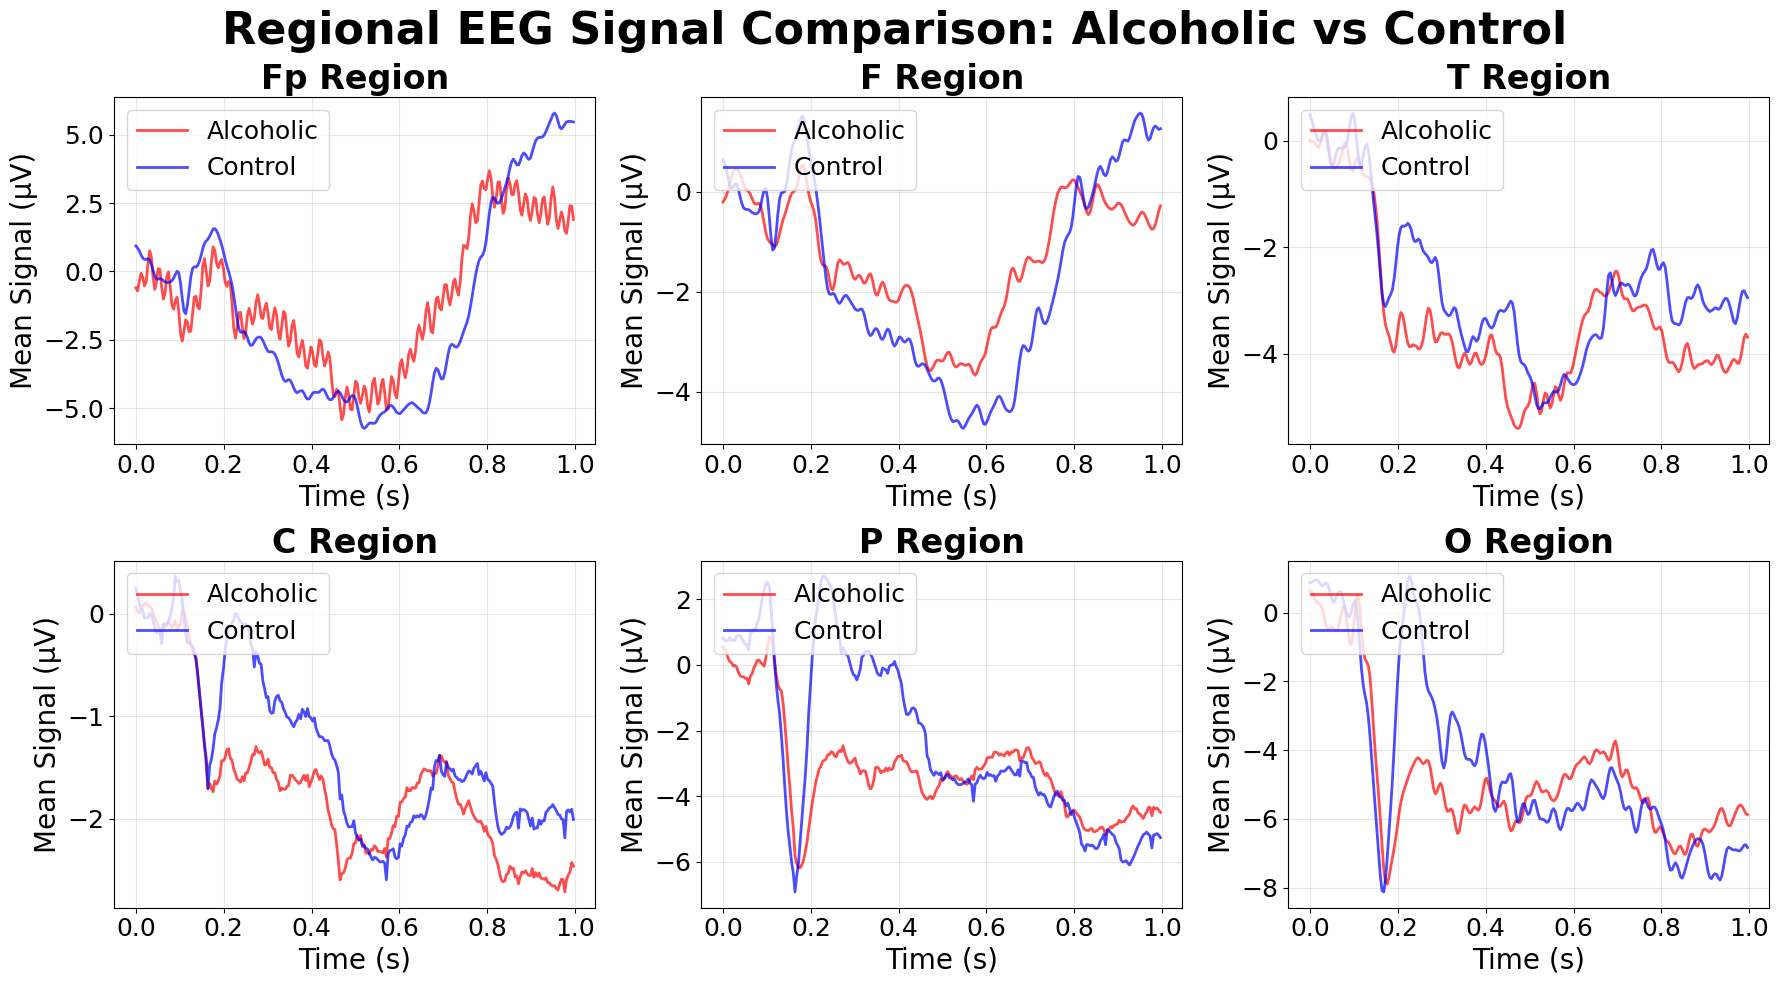


Regional Signal Differences (Mean, Std):
Fp Region:  +0.291 µV, Std:  1.735 µV
F  Region:  +0.314 µV, Std:  1.065 µV
T  Region:  -0.599 µV, Std:  0.715 µV
C  Region:  -0.361 µV, Std:  0.442 µV
P  Region:  -0.768 µV, Std:  1.809 µV
O  Region:  -0.274 µV, Std:  1.659 µV


In [18]:
# Visualize the differences between alcoholic and control groups
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

time_points = np.arange(256) / 256  # Frequency to time points  conversion

for idx, (region, diff) in enumerate(regional_differences.items()):
    ax = axes[idx]
    
    # Plot alcoholic mean
    ax.plot(time_points, alcoholic_means[region], label='Alcoholic', color='red', alpha=0.7, linewidth=2)
    
    # Plot control mean
    ax.plot(time_points, control_means[region], label='Control', color='blue', alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_ylabel('Mean Signal (µV)', fontsize=20)
    ax.set_title(f'{region} Region', fontsize=24, fontweight='bold')
    ax.legend(loc='upper left', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid(True, alpha=0.3)

plt.suptitle('Regional EEG Signal Comparison: Alcoholic vs Control', fontsize=32, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics
print("\nRegional Signal Differences (Mean, Std):")
for region in regions.keys():
    mean_diff = np.mean(regional_differences[region])
    std_diff = np.std(regional_differences[region])
    print(f"{region:2s} Region: {mean_diff:+7.3f} µV, Std: {std_diff:6.3f} µV") # Fancy formatting!